# Satellite observation : CT (Cloud Types) images 

The aim of this notebook is to indicate how to read the satellite data of Cloud Types. It is about discrete values distributed over 20 classes (from 0 to 19). The missing value is 255.

The time step is 15 minutes, the spatial resolution, 3km. Each file contains for a time step the data for 1 geographic zone ('NW' for North-West of France or 'SE' for South-East of France).

Remark : the *Basemap* library is required to plot the background map. Here is the command to type into in a terminal to install the package if you use the Anaconda environment : *conda install -c anaconda basemap*

In [1]:
#####TO DO ONLY IF YOU ARE A PROBLEM TO IMPORT THE BASEMAP LIBRARY -> PROBLEM OF TYPE "KeyError : 'PROJ_LIB'" (cf next cell)#####
#indicate the path to the file 'epsg'
#(located normally into the directory /Library/share of Anaconda) via the next commands : 
import os
os.environ["PROJ_LIB"]="C:/Users/larvorg/AppData/Local/Continuum/anaconda3/Library/share"   #-> type example of path

In [2]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.basemap import Basemap, cm 
from coordinates_and_projection import *

In [18]:
####Cell containing the modifiable fields######
zone = 'SE'          #geographic zone
path = 'D:/prez_opendata/data/output/samples/satellite/'   #path to the satellite data
day = '201801222000'     #date : day + hour

In [19]:
complete_path = path + zone + '/CT/'
file = day+'.npz'      #file name

#coordinates of study zone boundaries
lllat=DOMAINS[zone]['lry']    #lower left latitude
urlat=DOMAINS[zone]['uly']    #upper right latitude
lllon=DOMAINS[zone]['ulx']    #lower left longitude
urlon=DOMAINS[zone]['lrx']    #upper right longitude

In [20]:
#data loading
d = np.load(complete_path+file,allow_pickle=True)
d.files      #know the compressed file structure
data=d['arr_0']

Overview of data of type uint8

In [21]:
data

array([[10,  6,  6, ...,  1,  1,  1],
       [10,  6,  6, ...,  1,  1,  1],
       [10, 10,  6, ...,  1,  1,  1],
       ...,
       [11, 11, 11, ...,  2, 10, 12],
       [11, 11, 11, ...,  5, 10, 11],
       [11, 11, 11, ...,  2, 10, 12]], dtype=uint8)

Data dimensions : 
<ul>
<li>points number in longitude</li>
<li>points number in latitude</li>
</ul>    

In [22]:
data.shape

(120, 183)

Plot example for a given time step and a given zone:

<IPython.core.display.Javascript object>


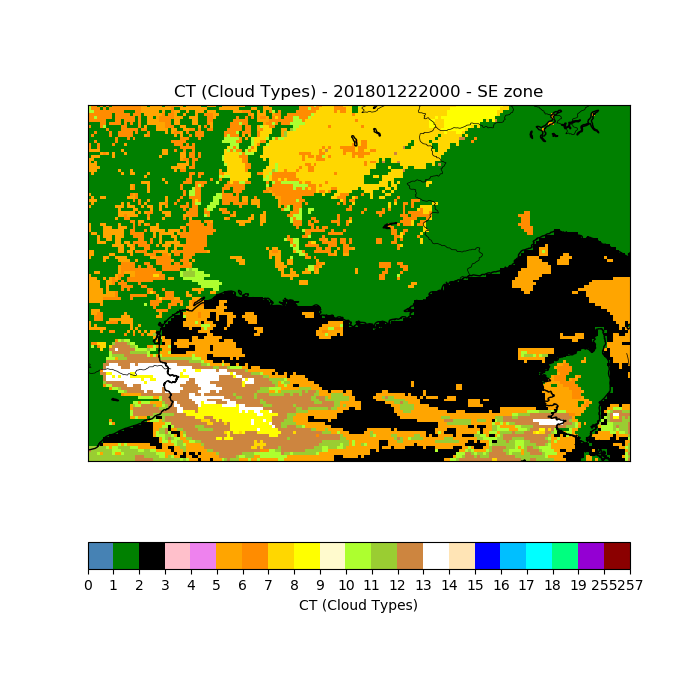

C:\Users\larvorg\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys
C:\Users\larvorg\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  app.launch_new_instance()


In [23]:
fig,ax=plt.subplots(1,1,figsize=(7,7))

#background map definition : coordinates of corners, resolution, projection type
m = Basemap(epsg=n_epsg,resolution='h',llcrnrlat=lllat,
                  urcrnrlat=urlat,
                  llcrnrlon=lllon,
                  urcrnrlon=urlon)

#colorbar definition
cmap = colors.ListedColormap(['steelblue','green', 'black', 'pink','violet', 'orange','darkorange','gold','yellow','lemonchiffon','greenyellow','yellowgreen','peru','white','moccasin','blue','deepskyblue','cyan','springgreen','darkviolet','darkred'])
bounds = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,255,257]
norm = colors.BoundaryNorm(bounds, cmap.N)

#plot the data and the background map (coastlines and borders)
m.drawcoastlines()
m.drawcountries()
img=m.imshow(data, interpolation='none', origin='upper',cmap=cmap,norm=norm)

cbar=plt.colorbar(img,boundaries=bounds, ticks=bounds,orientation= 'horizontal').set_label('CT (Cloud Types)')

plt.title("CT (Cloud Types) - "+day+" - "+zone+" zone")
plt.show()

Matching table Cloud Type number <-> cloud layer name :
<img src="CT_legend.png">

In [24]:
d.fid.close()